In [87]:
import pandas as pd

ads = pd.read_csv('Advertising.csv')
ads.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [88]:
ads.drop(labels = ['Unnamed: 0'], inplace=True, axis=1)

In [89]:
ads.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


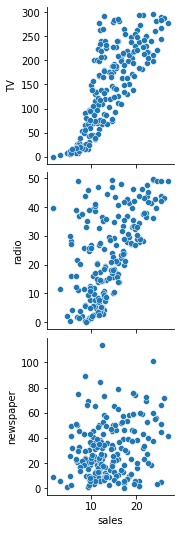

In [90]:
import seaborn as sns

sns.pairplot(ads, x_vars=['sales'], y_vars=['TV', 'radio', 'newspaper'])

In [91]:
ads.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


### Q1
From the correlation values between sales and money spend on various media, there's is relationship between them

### Q2
TV has strong relationship to sales, which is followed by Radio and Newspaper.

### Q3
All ads contribute to the sales although in various rates and proportions.

### Q4
Money spend on tv has higher correlation value. So it contribute the most to the sales, followed by radio and newspaper. Effect of spending in newspaper ads on sales is very low.

### Q5
Given the spending on ads, the sales can be predicted.

In [92]:
x = ads.drop(labels=['sales'], axis=1)
y = ads['sales']
x

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [93]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [94]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(x_train, y_train)

y_pred = lr_model.predict(x_test)

In [95]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.9141138102560418

In [96]:
import pickle

lr_sales_predictor = open("lr_sales_predictor.pkl", "wb") 
pickle.dump(lr_model, lr_sales_predictor) 
lr_sales_predictor.close()

In [97]:
tv_spending = float(input('Enter the spending on TV ads:\t'))
radio_spending = float(input('Enter the spending on radio ads:\t'))
newspaper_spending = float(input('Enter the spending on newspaper ads:\t'))

spending = [[tv_spending, radio_spending, newspaper_spending]]
sales = lr_model.predict(spending)
print(sales)

Enter the spending on TV ads:	180
Enter the spending on radio ads:	100
Enter the spending on newspaper ads:	50
[30.23247662]
